In [1]:
import logging
logger = logging.getLogger()
logger.setLevel(logging.INFO)

import sys
sys.path.append("../../")

%matplotlib widget

In [2]:
from src.basis import CircuitTemplate
basis = CircuitTemplate(maximum_span_guess=4, preseed=False)

In [3]:
from src.cost_function import BasicCost
objective = BasicCost()

In [4]:
from src.optimizer import TemplateOptimizer
optimizer = TemplateOptimizer(basis=basis, objective=objective, use_callback=True)

In [5]:
from src.sampler import HaarSample
sampler = HaarSample(n_samples=1)
ret = optimizer.approximate_from_distribution(sampler=sampler)

INFO:root:Starting sample iter 0
INFO:root:Begin search: (0.66759893, 0.21528317, 0.10466505)
INFO:root:Starting opt on template size 1
INFO:root:Starting opt on template size 2
INFO:root:Break on cycle 2
INFO:root:Loss=6.279154973753975e-11
INFO:root:Success: (0.66759893, 0.21528317, 0.10466505)
INFO:root:Saving data back to file


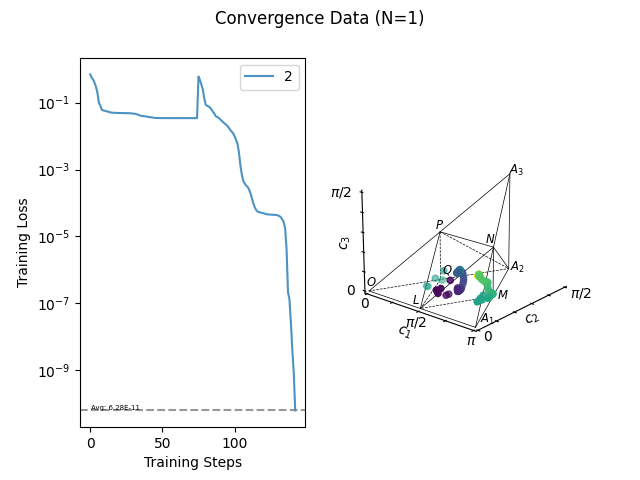

In [6]:
from src.utils.visualize import optimizer_training_plot
optimizer_training_plot(*ret);

In [1]:
import sys
sys.path.append("../../")

from src.basis import HamiltonianTemplate
from src.hamiltonian import ConversionGainHamiltonian
from src.cost_function import BasicCost
from src.optimizer import TemplateOptimizer
from src.sampler import GateSample
from src.utils.custom_gates import BerkeleyGate
from src.utils.visualize import optimizer_training_plot

2.1085133639076048e-11
[0.37500292305488314, 0.12500003432328546]


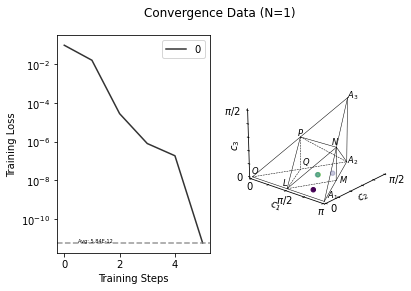

In [2]:
h = ConversionGainHamiltonian()
basis = HamiltonianTemplate(h=h)
objective = BasicCost()
optimizer = TemplateOptimizer(basis=basis, objective=objective, use_callback=True)
sampler = GateSample(BerkeleyGate())
ret = optimizer.approximate_from_distribution(sampler=sampler)
optimizer_training_plot(*ret);
ret = optimizer.approximate_target_U(sampler._get_unitary())
print(ret.loss_result)
from numpy import pi
print([el/pi for el in ret.Xk])

In [3]:
# from hamiltonian import Simul1QGatesHamiltonian
# h = Simul1QGatesHamiltonian()
# basis = HamiltonianTemplate(h=h)
# objective = BasicCost()
# optimizer = TemplateOptimizer(basis=basis, objective=objective, use_callback=True)
# sampler = GateSample(BerkeleyGate())
# ret = optimizer.approximate_from_distribution(sampler=sampler)
# optimizer_training_plot(*ret);
# ret = optimizer.approximate_target_U(sampler._get_unitary())
# print(ret.loss_result)
# from numpy import pi
# print([el/pi for el in ret.Xk])